In [14]:
#imports 
from pyexpat import model
from sklearn.preprocessing import LabelBinarizer
from sklearn.preprocessing import MinMaxScaler
import pandas as pd
import numpy as np
import glob
import os
import locale
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import MaxPooling2D, MaxPool2D
from tensorflow.keras.layers import AveragePooling2D
from tensorflow.keras.layers import Activation
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Input
from tensorflow.keras.models import Model
from sklearn.model_selection import train_test_split
from tensorflow.keras.layers import Dense, Add, ZeroPadding2D
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import concatenate
from tensorflow.keras.metrics import Precision, Recall, BinaryAccuracy
from sklearn import preprocessing
import locale
from matplotlib import pyplot as plt
import matplotlib.image as mpimg
from IPython.display import display
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
# from deepforest import CascadeForestClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from tensorflow.keras.layers import DepthwiseConv2D
from tensorflow.keras.layers import ReLU, AvgPool2D

In [15]:
def alexnet():
    model = Sequential()
    model.add(Conv2D(filters = 96, input_shape = (224, 224, 3),  
                kernel_size = (11, 11), strides = (4, 4),  
                padding = 'valid')) 
    model.add(Activation('relu')) 
    # Max-Pooling  
    model.add(MaxPooling2D(pool_size = (2, 2), 
                strides = (2, 2), padding = 'valid')) 
    # Batch Normalisation 
    model.add(BatchNormalization()) 
    
    # 2nd Convolutional Layer 
    model.add(Conv2D(filters = 256, kernel_size = (11, 11),  
                strides = (1, 1), padding = 'valid')) 
    model.add(Activation('relu')) 
    # Max-Pooling 
    model.add(MaxPooling2D(pool_size = (2, 2), strides = (2, 2),  
                padding = 'valid')) 
    # Batch Normalisation 
    model.add(BatchNormalization()) 
    
    # 3rd Convolutional Layer 
    model.add(Conv2D(filters = 384, kernel_size = (3, 3),  
                strides = (1, 1), padding = 'valid')) 
    model.add(Activation('relu')) 
    # Batch Normalisation 
    model.add(BatchNormalization()) 
    
    # 4th Convolutional Layer 
    model.add(Conv2D(filters = 384, kernel_size = (3, 3),  
                strides = (1, 1), padding = 'valid')) 
    model.add(Activation('relu')) 
    # Batch Normalisation 
    model.add(BatchNormalization()) 
    
    # 5th Convolutional Layer 
    model.add(Conv2D(filters = 256, kernel_size = (3, 3),  
                strides = (1, 1), padding = 'valid')) 
    model.add(Activation('relu')) 
    # Max-Pooling 
    model.add(MaxPooling2D(pool_size = (2, 2), strides = (2, 2),  
                padding = 'valid')) 
    # Batch Normalisation 
    model.add(BatchNormalization()) 
    
    # Flattening 
    model.add(Flatten()) 
    
    # 1st Dense Layer 
    model.add(Dense(4096, input_shape = (224*224*3, ))) 
    model.add(Activation('relu')) 
    # Add Dropout to prevent overfitting 
    model.add(Dropout(0.4)) 
    # Batch Normalisation 
    model.add(BatchNormalization()) 
    
    # 2nd Dense Layer 
    model.add(Dense(4096)) 
    model.add(Activation('relu')) 
    # Add Dropout 
    model.add(Dropout(0.4)) 
    # Batch Normalisation 
    model.add(BatchNormalization()) 
    model.add(Dense(2048, activation = 'relu'))
    model.add(Dropout(0.4))
    model.add(Dense(1, activation='relu'))
    return model


In [16]:
def get_top(x_input):
    """Block top operations
    This functions apply Batch Normalization and Leaky ReLU activation to the input.

    # Arguments:
        x_input: Tensor, input to apply BN and activation  to.

    # Returns:
        Output tensor
    """
    
    x = tf.keras.layers.BatchNormalization()(x_input)
    x = tf.keras.layers.LeakyReLU()(x)
    return x

def get_block(x_input, input_channels, output_channels):
    """MBConv block
    This function defines a mobile Inverted Residual Bottleneck block with BN and Leaky ReLU

    # Arguments
        x_input: Tensor, input tensor of conv layer.
        input_channels: Integer, the dimentionality of the input space.
        output_channels: Integer, the dimensionality of the output space.
            
    # Returns
        Output tensor.
    """

    x = tf.keras.layers.Conv2D(input_channels, kernel_size=(1, 1), padding='same', use_bias=False)(x_input)
    x = get_top(x)
    x = tf.keras.layers.DepthwiseConv2D(kernel_size=(1, 3), padding='same', use_bias=False)(x)
    x = get_top(x)
    x = tf.keras.layers.MaxPooling2D(pool_size=(2, 1), strides=(2, 1))(x)
    x = tf.keras.layers.DepthwiseConv2D(kernel_size=(3, 1), padding='same', use_bias=False)(x)
    x = get_top(x)
    x = tf.keras.layers.Conv2D(output_channels, kernel_size=(2, 1), strides=(1, 2), padding='same', use_bias=False)(x)
    return x


def efficientnet(plot_model=False):
    """EffNet
    This function defines a EfficientNet architecture.

    # Arguments
        input_shape: An integer or tuple/list of 3 integers, shape
            of input tensor.
        num_classes: Integer, number of classes.
        plot_model: Boolean, whether to plot model architecture or not
    # Returns
        EfficientNet model.
    """
    x_input = tf.keras.layers.Input(shape=(224,224,3))
    x = get_block(x_input, 32, 64)
    x = get_block(x, 64, 128)
    x = tf.keras.layers.Flatten()(x)  
    x = tf.keras.layers.Dense(1, activation='sigmoid')(x)
    model = tf.keras.models.Model(inputs=x_input, outputs=x)
    return model

In [17]:
def mobilnet_block (x, filters, strides):
    
    x = DepthwiseConv2D(kernel_size = 3, strides = strides, padding = 'same')(x)
    x = BatchNormalization()(x)
    x = ReLU()(x)
    
    x = Conv2D(filters = filters, kernel_size = 1, strides = 1)(x)
    x = BatchNormalization()(x)
    x = ReLU()(x)
    
    return x
def mobilenet():
    
    input = Input(shape = (224,224,3))
    x = Conv2D(filters = 32, kernel_size = 3, strides = 2, padding = 'same')(input)
    x = BatchNormalization()(x)
    x = ReLU()(x)

    # main part of the model
    x = mobilnet_block(x, filters = 64, strides = 1)
    x = mobilnet_block(x, filters = 128, strides = 2)
    x = mobilnet_block(x, filters = 128, strides = 1)
    x = mobilnet_block(x, filters = 256, strides = 2)
    x = mobilnet_block(x, filters = 256, strides = 1)
    x = mobilnet_block(x, filters = 512, strides = 2)
    for _ in range (5):
        x = mobilnet_block(x, filters = 512, strides = 1)
    x = mobilnet_block(x, filters = 1024, strides = 2)
    x = mobilnet_block(x, filters = 1024, strides = 1)
    x = AvgPool2D (pool_size = 7, strides = 1, data_format='channels_first')(x)
    x = tf.keras.layers.Dropout(0.4)(x)
    output= Flatten()(x)
    output = Dense (4096, activation = "relu",kernel_regularizer='l2')(output)
    output = (Dropout(0.4))(output)
    output = Dense (2048, activation = "relu",kernel_regularizer='l2')(output)
    output = Dense (1, activation = "sigmoid")(output)
    model = Model(inputs=input, outputs=output)
    return model

In [18]:
def identity_block(X, f, filters, stage, block):
   
    conv_name_base = 'res' + str(stage) + block + '_branch'
    bn_name_base = 'bn' + str(stage) + block + '_branch'
    F1, F2, F3 = filters

    X_shortcut = X
   
    X = Conv2D(filters=F1, kernel_size=(1, 1), strides=(1, 1), padding='valid', name=conv_name_base + '2a')(X)
    X = BatchNormalization(axis=3, name=bn_name_base + '2a')(X)
    X = Activation('relu')(X)

    X = Conv2D(filters=F2, kernel_size=(f, f), strides=(1, 1), padding='same', name=conv_name_base + '2b')(X)
    X = BatchNormalization(axis=3, name=bn_name_base + '2b')(X)
    X = Activation('relu')(X)

    X = Conv2D(filters=F3, kernel_size=(1, 1), strides=(1, 1), padding='valid', name=conv_name_base + '2c')(X)
    X = BatchNormalization(axis=3, name=bn_name_base + '2c')(X)
    X = Add()([X, X_shortcut])# SKIP Connection
    X = Activation('relu')(X)

    return X

def convolutional_block(X, f, filters, stage, block, s=2):
   
    conv_name_base = 'res' + str(stage) + block + '_branch'
    bn_name_base = 'bn' + str(stage) + block + '_branch'

    F1, F2, F3 = filters

    X_shortcut = X

    X = Conv2D(filters=F1, kernel_size=(1, 1), strides=(s, s), padding='valid', name=conv_name_base + '2a')(X)
    X = BatchNormalization(axis=3, name=bn_name_base + '2a')(X)
    X = Activation('relu')(X)

    X = Conv2D(filters=F2, kernel_size=(f, f), strides=(1, 1), padding='same', name=conv_name_base + '2b')(X)
    X = BatchNormalization(axis=3, name=bn_name_base + '2b')(X)
    X = Activation('relu')(X)
    X = Conv2D(filters=F3, kernel_size=(1, 1), strides=(1, 1), padding='valid', name=conv_name_base + '2c')(X)
    X = BatchNormalization(axis=3, name=bn_name_base + '2c')(X)
    X_shortcut = Conv2D(filters=F3, kernel_size=(1, 1), strides=(s, s), padding='valid', name=conv_name_base + '1',)(X_shortcut)
    X_shortcut = BatchNormalization(axis=3, name=bn_name_base + '1')         (X_shortcut)

    X = Add()([X, X_shortcut])
    X = Activation('relu')(X)

    return X

def ResNet50(input_shape=(224, 224, 3)):

    X_input = Input(input_shape)

    X = ZeroPadding2D((3, 3))(X_input)

    X = Conv2D(64, (7, 7), strides=(2, 2), name='conv1', )(X)
    X = BatchNormalization(axis=3, name='bn_conv1')(X)
    X = Activation('relu')(X)
    X = MaxPooling2D((3, 3), strides=(2, 2))(X)

    X = convolutional_block(X, f=3, filters=[64, 64, 256], stage=2, block='a', s=1)
    X = identity_block(X, 3, [64, 64, 256], stage=2, block='b')
    X = identity_block(X, 3, [64, 64, 256], stage=2, block='c')


    X = convolutional_block(X, f=3, filters=[128, 128, 512], stage=3, block='a', s=2)
    X = identity_block(X, 3, [128, 128, 512], stage=3, block='b')
    X = identity_block(X, 3, [128, 128, 512], stage=3, block='c')
    X = identity_block(X, 3, [128, 128, 512], stage=3, block='d')
    X = convolutional_block(X, f=3, filters=[256, 256, 1024], stage=4, block='a', s=2)
    X = identity_block(X, 3, [256, 256, 1024], stage=4, block='b')
    X = identity_block(X, 3, [256, 256, 1024], stage=4, block='c')
    X = identity_block(X, 3, [256, 256, 1024], stage=4, block='d')
    X = identity_block(X, 3, [256, 256, 1024], stage=4, block='e')
    X = identity_block(X, 3, [256, 256, 1024], stage=4, block='f')

    X = AveragePooling2D(pool_size=(2, 2), padding='same')(X)
    headModel = Flatten()(X)
    headModel=Dense(256, activation='relu', name='fc1')(headModel)
    headModel=Dense(128, activation='relu', name='fc2')(headModel)
    headModel = Dense( 1, name='fc3')(headModel)
    model = Model(inputs=X_input, outputs=headModel, name='ResNet50')
    return model


In [19]:

def vggnet():
    model = Sequential()
    model.add(Conv2D(input_shape=(224,224,3),filters=64,kernel_size=(3,3),padding="same", activation="relu"))
    model.add(Conv2D(filters=64,kernel_size=(3,3),padding="same", activation="relu"))
    model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))
    model.add(Conv2D(filters=128, kernel_size=(3,3), padding="same", activation="relu"))
    model.add(Conv2D(filters=128, kernel_size=(3,3), padding="same", activation="relu"))
    model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))
    model.add(Conv2D(filters=256, kernel_size=(3,3), padding="same", activation="relu"))
    model.add(Conv2D(filters=256, kernel_size=(3,3), padding="same", activation="relu"))
    model.add(Conv2D(filters=256, kernel_size=(3,3), padding="same", activation="relu"))
    model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))
    model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
    model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
    model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
    model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))
    model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
    model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
    # model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
    model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))
    model.add(Flatten())
    model.add(Dense(units=4096,activation="relu"))
    model.add(Dense(units=4096,activation="relu"))
    model.add(Dense(units=1, activation="sigmoid"))
    return model

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 741ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
1/1 ━━━━━━━

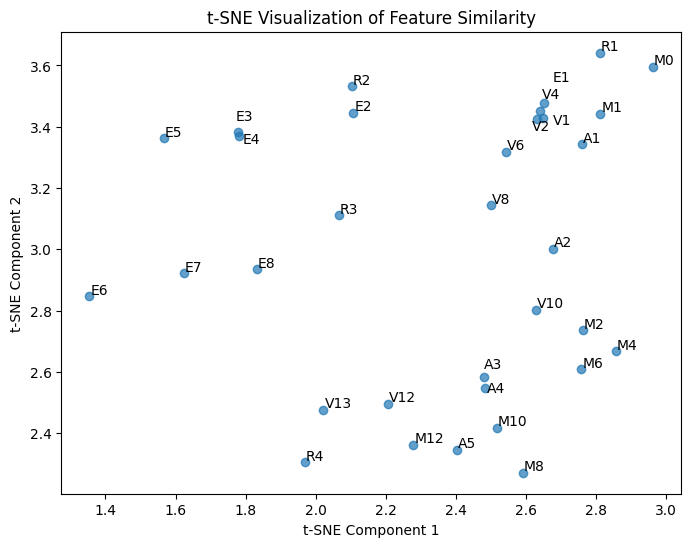

In [49]:
import cv2
import numpy as np
import os
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.resnet50 import preprocess_input
from tensorflow.keras.applications import ResNet50
from adjustText import adjust_text
model = ResNet50(weights='imagenet', include_top=False, pooling='avg')

# Image preprocessing function
def preprocess_image(image_path):
    img = image.load_img(image_path, target_size=(224, 224))
    img_array = image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)
    img_array = preprocess_input(img_array)
    return img_array

# Extract features from a set of images
def extract_features(image_paths):
    features = []
    for path in image_paths:
        img_array = preprocess_image(path)
        feature = model.predict(img_array).squeeze()
        features.append(feature)
    return np.array(features)


# Load image paths from a folder
image_folder = '/Users/eddie/Downloads/Pictures/AlexNet'  # Change this to your folder path
image_paths = [os.path.join(image_folder, img) for img in os.listdir(image_folder) if img.endswith(('png', 'jpg', 'jpeg'))]
file_names = []
image_paths=[]
for img in os.listdir(image_folder):
    image_paths.append(os.path.join(image_folder,img))
    file_names.append(img)
features = extract_features(image_paths)

perplexity = min(30, len(features) - 1)  # Ensures perplexity is valid
tsne = TSNE(n_components=2, perplexity=perplexity, random_state=42)
embedded_features = tsne.fit_transform(features)

# Plot t-SNE results
plt.figure(figsize=(8, 6))
plt.scatter(embedded_features[:, 0], embedded_features[:, 1], alpha=0.7)
annotations = []
for i, path in enumerate(image_paths):
    if(path == "/Users/eddie/Downloads/Pictures/AlexNet/E1.png"):
        continue
    annotations.append(plt.annotate(file_names[i][:-4], (embedded_features[i, 0], embedded_features[i, 1])))


adjust_text(annotations)

plt.title('t-SNE Visualization of Feature Similarity')
plt.xlabel('t-SNE Component 1')
plt.ylabel('t-SNE Component 2')
plt.show()